# Magnetic Dipole Approximation Demo

This demo verifies the magnetic dipole approximation.

In [5]:
import numpy as np
from em_app.currentcoils import RingCoil
# from em_app import plotting
import matplotlib.pyplot as plt
from mtflib import mtf

mtf.initialize_mtf(max_order=6, max_dimension=4)

Initializing MTF globals with: _MAX_ORDER=6, _MAX_DIMENSION=4
Loading/Precomputing Taylor coefficients up to order 6
Global precomputed coefficients loading/generation complete.
Size of precomputed_coefficients dictionary in memory: 464 bytes, 0.45 KB, 0.00 MB
MTF globals initialized: _MAX_ORDER=6, _MAX_DIMENSION=4, _INITIALIZED=True
Max coefficient count (order=6, nvars=4): 210
Precomputed coefficients loaded and ready for use.


### 1. Visualize the Geometry

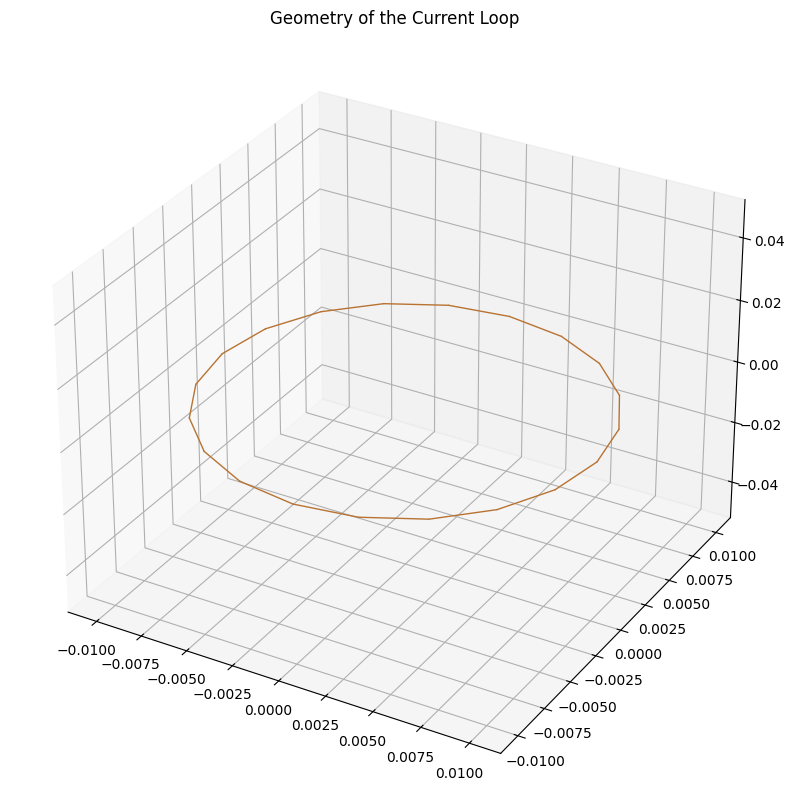

In [6]:
ring_radius = 0.01
center_point = np.array([0, 0, 0])
axis_direction = np.array([0, 0, 1])
ring = RingCoil(1.0, ring_radius, 20, center_point, axis_direction)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ring.plot(ax)
ax.set_title("Geometry of the Current Loop")
plt.show()

### 2. Function to Calculate Approximation Error

In [ ]:
def calculate_error_at_distance(distance):
    ring_radius = 0.01
    current = 1.0
    center_point = np.array([0, 0, 0])
    axis_direction = np.array([0, 0, 1])
    loop = RingCoil(current, ring_radius, 20, center_point, axis_direction)

    field_point = np.array([[0, distance, 0]])
    B_vector = loop.biot_savart(field_point)
    B_numerical = B_vector._b_vectors_numerical
    print(B_numerical)

    mu_0_4pi = 1e-7
    area = np.pi * ring_radius**2
    m_vec = np.array([0, 0, current * area])
    r_vec = np.array([0, distance, 0])
    r_mag = np.linalg.norm(r_vec)

    term1 = 3 * np.dot(m_vec, r_vec) * r_vec / (r_mag**5)
    term2 = m_vec / (r_mag**3)
    B_analytical = mu_0_4pi * (term1 - term2)

    error = np.linalg.norm(B_numerical - B_analytical)
    return error

### 3. Run Simulation Over a Range of Distances

In [14]:
distances = np.logspace(0, 2, 20)
errors = []
for d in distances:
    error = calculate_error_at_distance(d)
    print(f"Distance: {d:.2f}, Error: {error:.2e}")
    errors.append(error)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

### 4. Plot Error vs. Distance

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(distances, errors, "o-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance from loop (m)")
plt.ylabel("Approximation Error")
plt.title("Dipole Approximation Error vs. Distance")
plt.grid(True, which="both", ls="--")
plt.show()